# __Fashion MNIST Data classification using CNN__

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import sklearn

2021-09-23 00:32:46.087729: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-23 00:32:46.087801: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
y_train[0]

9

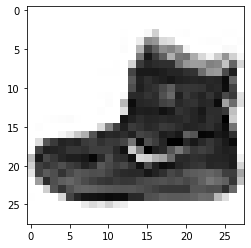

In [6]:
plt.imshow(X_train[0], cmap = 'Greys')

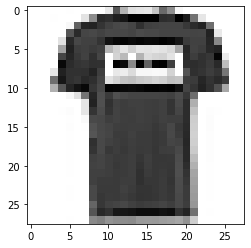

In [7]:
plt.imshow(X_train[1], cmap = 'Greys')

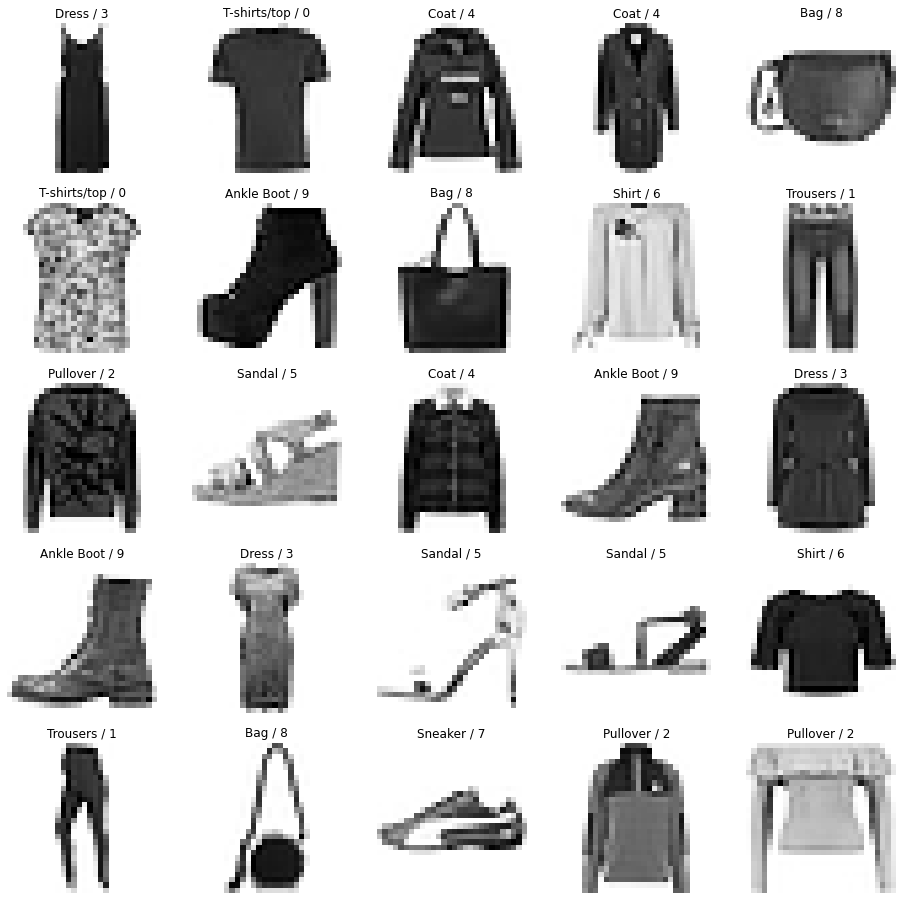

In [8]:
class_labels = ['T-shirts/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j); j+=1
    plt.imshow(X_train[i], cmap="Greys")
    plt.axis('off')
    plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [9]:
X_train = np.expand_dims(X_train, -1)

In [10]:
X_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train,y_train,test_size=0.2, random_state=2020)

In [13]:
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

# CNN Model

In [14]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation='relu',input_shape=[28,28,1]),
                                 keras.layers.MaxPooling2D(pool_size=(2,2)),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=128, activation='relu'),
                                 keras.layers.Dense(units=10, activation='softmax')
                                ])

2021-09-23 00:32:59.694151: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-23 00:32:59.694484: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-23 00:32:59.694549: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-09-23 00:32:59.694602: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-09-23 00:32:59.694653: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train, epochs=10, batch_size=512, verbose= 1, validation_data=(X_validation, y_validation))

2021-09-23 00:33:01.172504: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
94/94 [==============================] - 6s 59ms/step - loss: 0.6310 - accuracy: 0.7852 - val_loss: 0.4300 - val_accuracy: 0.8487
Epoch 2/10
94/94 [==============================] - 5s 58ms/step - loss: 0.3821 - accuracy: 0.8664 - val_loss: 0.3558 - val_accuracy: 0.8781
Epoch 3/10
94/94 [==============================] - 5s 58ms/step - loss: 0.3314 - accuracy: 0.8838 - val_loss: 0.3311 - val_accuracy: 0.8864
Epoch 4/10
94/94 [==============================] - 5s 58ms/step - loss: 0.3029 - accuracy: 0.8940 - val_loss: 0.3146 - val_accuracy: 0.8928
Epoch 5/10
94/94 [==============================] - 5s 58ms/step - loss: 0.2841 - accuracy: 0.8995 - val_loss: 0.3037 - val_accuracy: 0.8943
Epoch 6/10
94/94 [==============================] - 5s 58ms/step - loss: 0.2669 - accuracy: 0.9051 - val_loss: 0.2961 - val_accuracy: 0.8968
Epoch 7/10
94/94 [==============================] - 6s 59ms/step - loss: 0.2513 - accuracy: 0.9106 - val_loss: 0.2900 - val_accuracy: 0.8982
Epoch 8/10
94

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [18]:
y_pred = model.predict(X_train)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.83, 0.  , 0.03, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [19]:
y_train

array([4, 4, 6, ..., 8, 3, 1], dtype=uint8)

# Testing the Model

In [20]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [21]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [22]:
y_test[0]

9

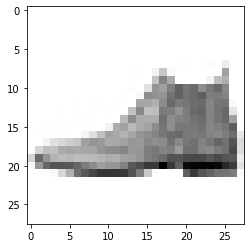

In [23]:
plt.imshow(X_test[0], cmap='Greys')

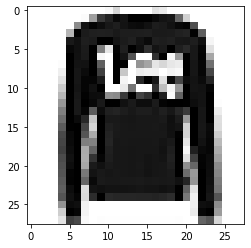

In [24]:
plt.imshow(X_test[1], cmap='Greys')

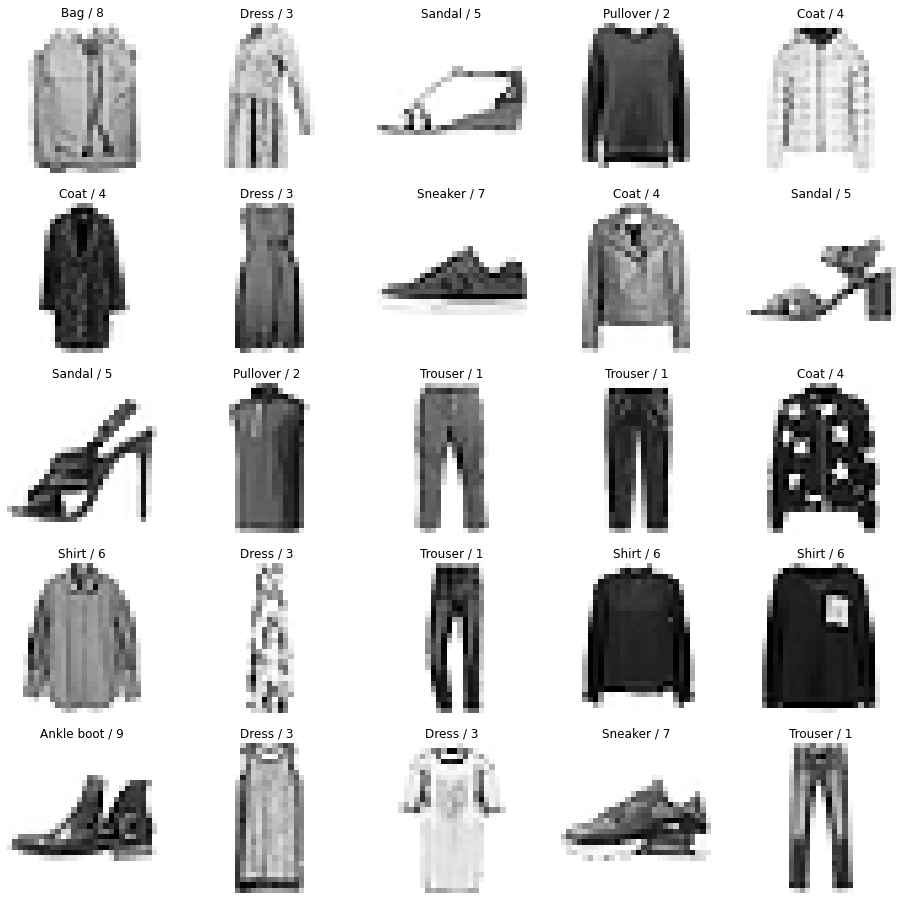

In [25]:
class_labels = ['T-shirt/top','Trouser',	'Pullover','Dress','Coat',	'Sandal',	'Shirt',	'Sneaker',	'Bag',	'Ankle boot']
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j); j+=1
    plt.imshow(X_train[i], cmap="Greys")
    plt.axis('off')
    plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [26]:
X_test.shape

(10000, 28, 28)

In [27]:
X_test.ndim

3

In [28]:
X_test = np.expand_dims(X_test, -1)

In [29]:
X_test[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train,y_train,test_size=0.2, random_state=2020)

In [31]:
X_test.shape, X_validation.shape, y_test.shape, y_validation.shape

((10000, 28, 28, 1), (9600, 28, 28, 1), (10000,), (9600,))

In [32]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation='relu',input_shape=[28,28,1]),
                                 keras.layers.MaxPooling2D(pool_size=(2,2)),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=128, activation='relu'),
                                 keras.layers.Dense(units=10, activation='softmax')
                                ])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [35]:
model.fit(X_test, y_test, epochs=10, batch_size=512, verbose= 1, validation_data=(X_validation, y_validation))

Epoch 1/10
20/20 [==============================] - 2s 75ms/step - loss: 1.1358 - accuracy: 0.6457 - val_loss: 0.6409 - val_accuracy: 0.7754
Epoch 2/10
20/20 [==============================] - 1s 70ms/step - loss: 0.5743 - accuracy: 0.7951 - val_loss: 0.5065 - val_accuracy: 0.8171
Epoch 3/10
20/20 [==============================] - 1s 69ms/step - loss: 0.4846 - accuracy: 0.8248 - val_loss: 0.4629 - val_accuracy: 0.8388
Epoch 4/10
20/20 [==============================] - 1s 69ms/step - loss: 0.4313 - accuracy: 0.8496 - val_loss: 0.4369 - val_accuracy: 0.8433
Epoch 5/10
20/20 [==============================] - 1s 69ms/step - loss: 0.4048 - accuracy: 0.8597 - val_loss: 0.4119 - val_accuracy: 0.8554
Epoch 6/10
20/20 [==============================] - 1s 72ms/step - loss: 0.3763 - accuracy: 0.8685 - val_loss: 0.3842 - val_accuracy: 0.8658
Epoch 7/10
20/20 [==============================] - 1s 73ms/step - loss: 0.3496 - accuracy: 0.8788 - val_loss: 0.3730 - val_accuracy: 0.8703
Epoch 8/10
20